# UberEats配達データ分析

In [1]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0)

In [3]:
date = "2020/05/03"

In [4]:
FILE_PATH = './../data/trip_master.csv'
master = pd.read_csv(FILE_PATH, index_col='id')

In [5]:
print(len(master))
# master.head(5)

1052


In [6]:
master.columns

Index(['date', 'day', 'day_of_week', 'distance', 'drive_time', 'drop_address',
       'drop_latitude', 'drop_longitude', 'drop_time', 'month',
       'pickup_address', 'pickup_latitude', 'pickup_longitude', 'pickup_time',
       'price', 'url', 'year', 'cash', 'peak'],
      dtype='object')

In [7]:
df = master.assign(
    pickup_datetime= master.apply(lambda x: datetime.datetime(year=x.year, month=x.month, day=x.day, 
                                                           hour=int(x.pickup_time.split(':')[0]), minute=int(x.pickup_time.split(':')[1])), axis=1),
    drop_datetime= master.apply(lambda x: datetime.datetime(year=x.year, month=x.month, day=x.day, 
                                                           hour=int(x.drop_time.split(':')[0]), minute=int(x.drop_time.split(':')[1])), axis=1),    
    shop_position_id = master.apply(lambda x: str(x.pickup_latitude) + "-" + str(x.pickup_longitude), axis=1)
                  ) .drop(['date', 'day', 'year', 'url', 'pickup_latitude', 'pickup_time', 'pickup_longitude', 'pickup_address', 
                           'day_of_week', 'pickup_time', 'drop_time', "drop_address", "drop_latitude", "drop_longitude"], axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1052 entries, d92f23b6-46a8-48d7-823c-8cadb9182193 to adaa2a16-5070-4656-92df-c4d337dfa0cb
Data columns (total 9 columns):
distance            1052 non-null float64
drive_time          1044 non-null float64
month               1052 non-null int64
price               1021 non-null float64
cash                879 non-null float64
peak                879 non-null float64
pickup_datetime     1052 non-null datetime64[ns]
drop_datetime       1052 non-null datetime64[ns]
shop_position_id    1052 non-null object
dtypes: datetime64[ns](2), float64(5), int64(1), object(1)
memory usage: 82.2+ KB


In [9]:
df['date'] = df['pickup_datetime'].dt.date
df['day_of_week_num'] = df['pickup_datetime'].dt.dayofweek
df['day_of_week'] = df['pickup_datetime'].dt.weekday_name
df['month_day_num'] = df['pickup_datetime'].dt.day
df["hour_of_day"] = df['pickup_datetime'].dt.hour
df["week_of_month"] = df['pickup_datetime'].dt.week

In [10]:
# df.head(3)

## 毎日のデータ集計

In [11]:
target_day = datetime.datetime.strptime(date, "%Y/%m/%d").date()

# target_day = datetime.datetime(2020, 3, 21).date()
# target_day = datetime.datetime.today().date()
df_day = df[df["date"] == target_day].sort_values('pickup_datetime')

In [12]:
df_day

,distance,drive_time,month,price,cash,peak,pickup_datetime,drop_datetime,shop_position_id,date,day_of_week_num,day_of_week,month_day_num,hour_of_day,week_of_month
id,,,,,,,,,,,,,,,
2e0dc1af-24a6-484c-ab7b-e9c04194b1a8,1.27,9.1,5,511.0,0.0,110.0,2020-05-03 11:13:00,2020-05-03 11:29:00,35.5881462097168-139.63064575195312,2020-05-03,6,Sunday,3,11,18
640921a1-8b9c-49b5-aa2f-cdadb41e3ebe,2.69,14.2,5,607.0,0.0,130.0,2020-05-03 11:24:00,2020-05-03 11:46:00,35.58617782592773-139.64292907714844,2020-05-03,6,Sunday,3,11,18
fe114427-e69c-4509-b323-156c6a1f27e9,1.38,11.0,5,568.0,3033.0,160.0,2020-05-03 11:41:00,2020-05-03 12:00:00,35.603145599365234-139.61630249023438,2020-05-03,6,Sunday,3,11,18
8db2358d-1067-4528-b9b3-dc623684ff16,1.05,10.3,5,389.0,4028.0,0.0,2020-05-03 12:02:00,2020-05-03 12:20:00,35.60311508178711-139.6162872314453,2020-05-03,6,Sunday,3,12,18
a298982a-7f70-4eca-8f54-5ad4b7b49440,0.00,0.0,5,0.0,0.0,0.0,2020-05-03 12:25:00,2020-05-03 12:57:00,35.600318908691406-139.61367797851562%7C35.600...,2020-05-03,6,Sunday,3,12,18
a298982a-7f70-4eca-8f54-5ad4b7b49440,3.27,32.0,5,806.0,1289.0,190.0,2020-05-03 12:25:00,2020-05-03 12:57:00,35.600318908691406-139.61367797851562%7C35.600...,2020-05-03,6,Sunday,3,12,18
6f76a59d-e5e7-4867-89bf-3ed6f19eabb1,2.08,12.0,5,445.0,0.0,0.0,2020-05-03 13:09:00,2020-05-03 13:33:00,35.58789825439453-139.6289825439453,2020-05-03,6,Sunday,3,13,18
182517ca-c9c7-49b3-aeb2-46b03458572f,0.69,9.5,5,370.0,0.0,0.0,2020-05-03 13:48:00,2020-05-03 13:59:00,35.583553314208984-139.6330108642578,2020-05-03,6,Sunday,3,13,18
adaa2a16-5070-4656-92df-c4d337dfa0cb,1.29,10.3,5,402.0,0.0,0.0,2020-05-03 17:08:00,2020-05-03 17:31:00,35.58124923706055-139.6419677734375,2020-05-03,6,Sunday,3,17,18


In [13]:
drive_count = len(df_day)
drive_hours = round(df_day["drive_time"].sum() / 60, 1)
drive_length = round(df_day["distance"].sum() , 2)
total_price = df_day["price"].sum()
long_count = len(df_day[df_day["distance"] >= 2])
short_count = len(df_day[(df_day["distance"] < 1) & (df_day["distance"] > 0) ])
double_count = len(df_day[df_day["distance"] == 0])
cash_count = len(df_day[df_day["cash"] != 0])
peak_count = len(df_day[df_day["peak"] != 0])
peak_sum = int(df_day[df_day["peak"] != 0].sum()["peak"])

In [14]:
print("{}  配達件数: {}件, 配達時間: {}h, 配達距離: {}km, 配達報酬: {}円, ロング{}件, ショート{}件, ピーク{}件({}円), 現金{}件, ダブル{}件"
      .format(target_day, drive_count, drive_hours, drive_length, total_price, long_count, short_count, peak_count, peak_sum, cash_count, double_count))

2020-05-03  配達件数: 15件, 配達時間: 3.4h, 配達距離: 25.48km, 配達報酬: 7368.0円, ロング6件, ショート2件, ピーク9件(1230円), 現金6件, ダブル1件


## 日別の集計

In [15]:
groupby = df.groupby('date')

In [16]:
df_by_day = pd.DataFrame()
df_by_day["配達件数"] = groupby["pickup_datetime"].count()
df_by_day["配達時間(h)"] = round(groupby["drive_time"].sum() / 60, 1)
df_by_day["配達距離(km)"] = groupby["distance"].sum()
df_by_day["配達報酬(円)"] = groupby["price"].sum()
df_by_day["ロング"] = groupby.apply(lambda x: x[x.distance >= 2]['distance'].count())
df_by_day["ダブル"] = groupby.apply(lambda x: x[x.distance == 0]['distance'].count())
df_by_day["ショート"] = groupby.apply(lambda x: x[x.distance < 2]['distance'].count()) - df_by_day["ダブル"]
df_by_day["ピーク件数"] = groupby.apply(lambda x: x[x.peak != 0]['peak'].count())
df_by_day["現金件数"] = groupby.apply(lambda x: x[x.cash != 0]['cash'].count())
df_by_day["1kmの時間(分)"] = round(groupby["drive_time"].sum() / groupby["distance"].sum(), 1)
df_by_day["時速"] = round(groupby["distance"].sum()/(groupby["drive_time"].sum()/60), 2)
df_by_day["平均距離"] = round(groupby["distance"].mean(), 2)

In [17]:
df_by_day.index.name = '月日'
df_by_day.tail(30)

,配達件数,配達時間(h),配達距離(km),配達報酬(円),ロング,ダブル,ショート,ピーク件数,現金件数,1kmの時間(分),時速,平均距離
月日,,,,,,,,,,,,
2020-03-21,14,3.5,24.11,5956.0,5,0,9,0,4,8.8,6.84,1.72
2020-03-22,5,1.1,5.44,2186.0,0,0,5,1,2,12.3,4.87,1.09
2020-03-25,12,2.9,23.98,5622.0,6,0,6,0,2,7.2,8.35,2.00
2020-03-26,20,4.6,37.98,9146.0,8,0,12,3,6,7.2,8.29,1.90
2020-03-27,11,2.2,19.29,5358.0,4,0,7,0,3,7.0,8.58,1.75
2020-03-28,13,3.1,26.04,6496.0,7,0,6,2,3,7.1,8.41,2.00
2020-03-30,18,4.6,37.20,8293.0,7,0,11,1,9,7.4,8.06,2.07
2020-03-31,17,4.2,34.61,8290.0,8,0,9,1,8,7.3,8.19,2.04
2020-04-02,10,2.5,17.34,4542.0,4,0,6,0,5,8.6,6.99,1.73


## 週別の集計

In [18]:
groupby = df.groupby('week_of_month')

In [19]:
df_by_week = pd.DataFrame()
df_by_week["配達件数"] = groupby["pickup_datetime"].count()
df_by_week["配達時間(h)"] = round(groupby["drive_time"].sum() / 60, 1)
df_by_week["配達距離(km)"] = groupby["distance"].sum()
df_by_week["配達報酬(円)"] = groupby["price"].sum()
df_by_week["ロング"] = groupby.apply(lambda x: x[x.distance >= 2]['distance'].count())
df_by_week["ダブル"] = groupby.apply(lambda x: x[x.distance == 0]['distance'].count())
df_by_week["ショート"] = groupby.apply(lambda x: x[x.distance < 1]['distance'].count()) - df_by_week["ダブル"]
df_by_week["ピーク件数"] = groupby.apply(lambda x: x[x.peak != 0]['peak'].count())
df_by_week["現金件数"] = groupby.apply(lambda x: x[x.cash != 0]['cash'].count())
df_by_week["1kmの時間(分)"] = round(groupby["drive_time"].sum() / groupby["distance"].sum(), 1)
df_by_week["時速"] = round(groupby["distance"].sum()/(groupby["drive_time"].sum()/60), 2)
df_by_week["平均距離"] = round(groupby["distance"].mean(), 1)

In [20]:
df_by_week.index.name = '週番号'
df_by_week.tail(30)

,配達件数,配達時間(h),配達距離(km),配達報酬(円),ロング,ダブル,ショート,ピーク件数,現金件数,1kmの時間(分),時速,平均距離
週番号,,,,,,,,,,,,
1,26,6.5,40.66,12875.0,7,0,3,0,0,9.6,6.23,1.6
2,59,15.0,88.88,26269.0,13,0,14,0,0,10.1,5.93,1.5
3,42,10.4,67.94,20883.0,13,0,12,13,22,9.2,6.51,1.6
4,31,7.5,56.67,14836.0,11,0,3,5,19,8.0,7.52,1.8
5,51,13.2,87.63,26421.0,14,0,8,16,30,9.1,6.62,1.7
6,35,8.4,55.55,17142.0,9,0,10,1,9,9.1,6.62,1.6
7,56,12.5,80.61,28469.0,10,0,15,13,16,9.3,6.44,1.4
8,54,11.2,74.19,25641.0,4,0,13,8,23,9.1,6.61,1.4
9,52,11.9,78.87,28619.0,11,0,12,9,14,9.0,6.64,1.5


## 月別の集計

In [21]:
groupby = df.groupby('month')
df_by_month = pd.DataFrame()
df_by_month["配達件数"] = groupby["pickup_datetime"].count()
df_by_month["配達時間(h)"] = round(groupby["drive_time"].sum() / 60, 1)
df_by_month["配達距離(km)"] = groupby["distance"].sum()
df_by_month["配達報酬(円)"] = groupby["price"].sum()
df_by_month["ロング"] = groupby.apply(lambda x: x[x.distance >= 2]['distance'].count())
df_by_month["ダブル"] = groupby.apply(lambda x: x[x.distance == 0]['distance'].count())
df_by_month["ショート"] = groupby.apply(lambda x: x[x.distance < 1]['distance'].count()) - df_by_month["ダブル"]
df_by_month["ピーク件数"] = groupby.apply(lambda x: x[x.peak != 0]['peak'].count())
df_by_month["現金件数"] = groupby.apply(lambda x: x[x.cash != 0]['cash'].count())
df_by_month["1kmの時間(分)"] = round(groupby["drive_time"].sum() / groupby["distance"].sum(), 1)
df_by_month["時速"] = round(groupby["distance"].sum()/(groupby["drive_time"].sum()/60), 2)
df_by_month["平均距離"] = round(groupby["distance"].mean(), 1)

In [22]:
df_by_month.index.name = '月'
df_by_month

,配達件数,配達時間(h),配達距離(km),配達報酬(円),ロング,ダブル,ショート,ピーク件数,現金件数,1kmの時間(分),時速,平均距離
月,,,,,,,,,,,,
1,168,42.3,275.81,79884.0,48,0,33,24,56,9.2,6.52,1.6
2,212,48.0,312.48,108459.0,37,0,54,39,73,9.2,6.51,1.5
3,187,43.6,332.59,88425.0,65,0,31,19,59,7.9,7.63,1.8
4,325,74.9,599.77,145389.0,126,6,51,41,82,7.5,8.01,1.8
5,60,14.5,107.51,28907.0,23,5,8,29,19,8.1,7.40,1.8
12,100,33.1,169.77,48737.0,27,0,19,0,0,11.7,5.13,1.7


## 全データ分析

Text(0.5, 1.0, '曜日ごとの配達回数')

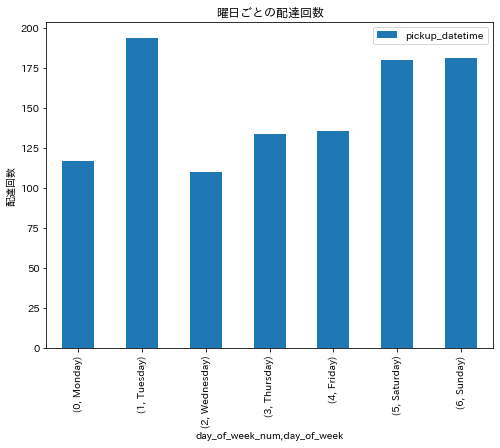

In [23]:
uber_weekdays = df.pivot_table(index=['day_of_week_num','day_of_week'],
                                  values='pickup_datetime',
                                  aggfunc='count')
uber_weekdays.plot(kind='bar')
plt.ylabel('配達回数')
plt.title('曜日ごとの配達回数')

Text(0.5, 1.0, '日にちごとの配達回数')

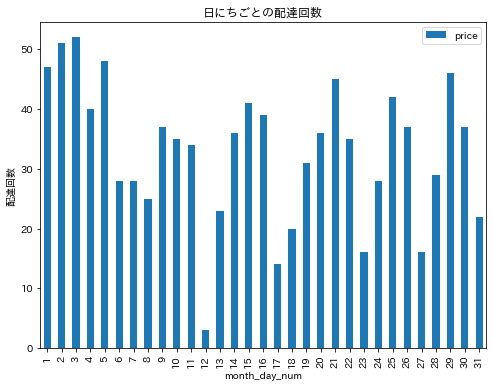

In [24]:
uber_monthdays = df.pivot_table(index=['month_day_num'],
                                  values='price',
                                  aggfunc='count')
uber_monthdays.plot(kind='bar')
plt.ylabel('配達回数')
plt.title('日にちごとの配達回数')

Text(0.5, 1.0, '時間ごとの配達回数')

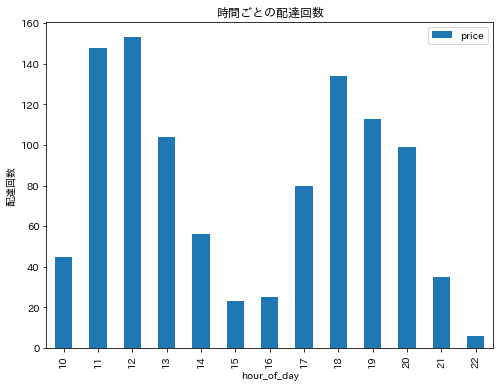

In [25]:
uber_hour = df.pivot_table(index=['hour_of_day'],
                                  values='price',
                                  aggfunc='count')
uber_hour.plot(kind='bar')
plt.ylabel('配達回数')
plt.title('時間ごとの配達回数')

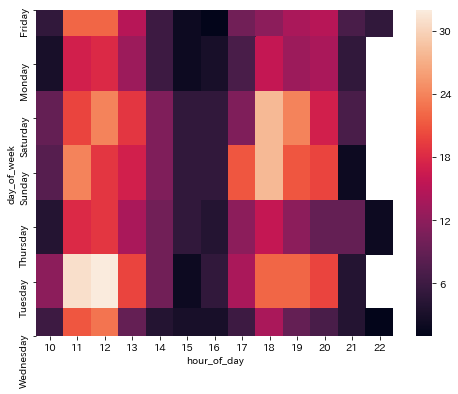

In [26]:
def count_rows(rows):
    return len(rows)

by_cross = df.groupby('day_of_week hour_of_day'.split()).apply(count_rows).unstack()
sns.heatmap(by_cross)

## 